# Single model

This notebook goes through the solution and simulation of the single model. 

We ensure the correctness of the solution by visualizing consumption and value functions and calculating Euler errors.

We ensure the empirical validity of the model by simulating a lifecycle and calculating retirement probabilities

Finally we time the solution and simulation

### Setup

In [1]:
from consav import runtools
runtools.write_numba_config(disable=0,threads=8)

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Local modules
from Model import RetirementClass
import funs
import figs
import transitions

# Global modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Solution

In [2]:
test = RetirementClass()
test.solve()
test.simulate(euler=True)

### Consumption functions (d=0) for high skilled woman eligible to ERP

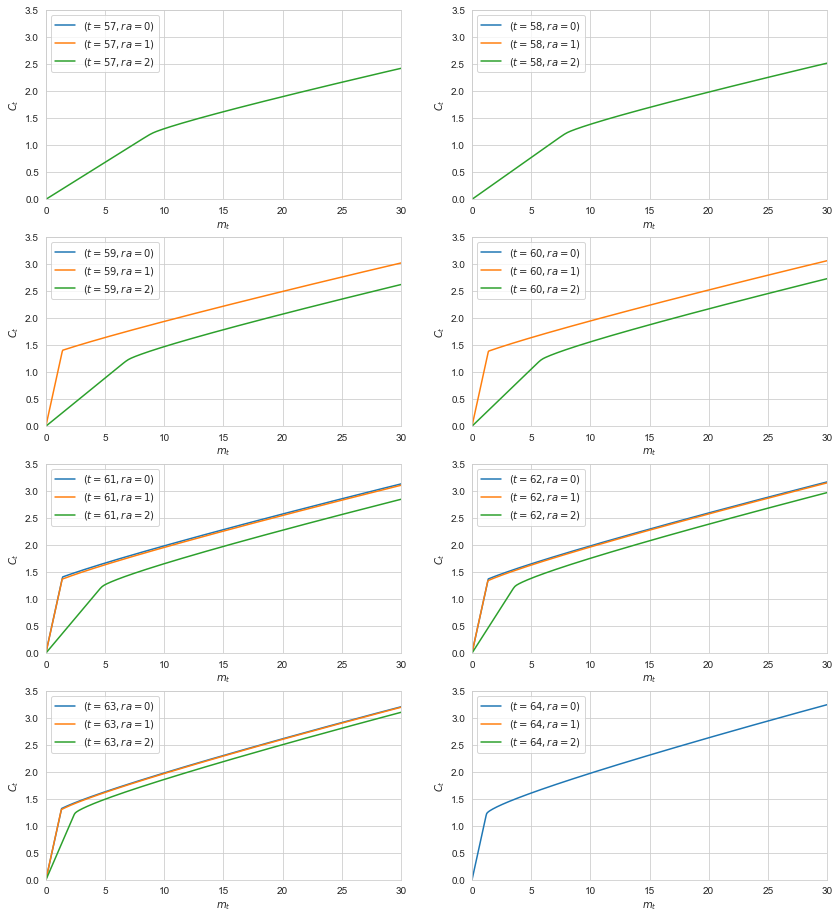

In [3]:
nrow = 4
ncol = 2
fig, axes = plt.subplots(nrow,ncol,figsize=(14,16))
axs = axes.flatten()
for t in range(nrow*ncol):        
    figs.policy(test,axs[t],var='c',T=[t],MA=[0],ST=[3],RA=[0,1,2],D=[0],label=['t','ra'],xlim=[0,30],ylim=[0,3.5])
plt.show()

### Consumption functions (d=1) for high skilled woman eligible to ERP

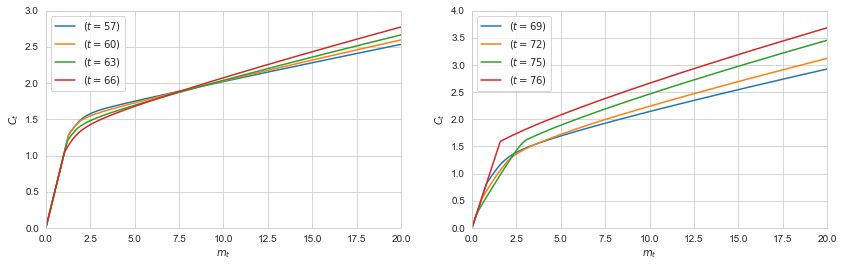

In [4]:
nrow = 1
ncol = 2
fig, axs = plt.subplots(nrow,ncol,figsize=(14,4))
figs.policy(test,axs[0],var='c',T=[0,3,6,9],MA=[0],ST=[3],RA=[0],D=[1],label=['t'],xlim=[0,20],ylim=[0,3])
figs.policy(test,axs[1],var='c',T=[12,15,18,19],MA=[0],ST=[3],RA=[0],D=[1],label=['t'],xlim=[0,20],ylim=[0,4])    
plt.show()

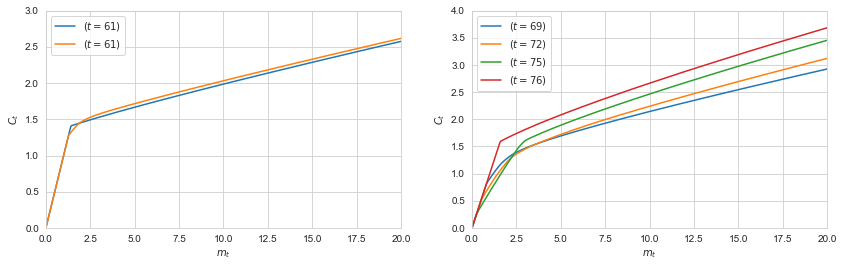

In [5]:
nrow = 1
ncol = 2
fig, axs = plt.subplots(nrow,ncol,figsize=(14,4))
figs.policy(test,axs[0],var='c',T=[4],MA=[0],ST=[3],RA=[0],D=[0,1],label=['t'],xlim=[0,20],ylim=[0,3])
figs.policy(test,axs[1],var='c',T=[12,15,18,19],MA=[0],ST=[3],RA=[0],D=[1],label=['t'],xlim=[0,20],ylim=[0,4])    
plt.show()

### Average retirement probabilities

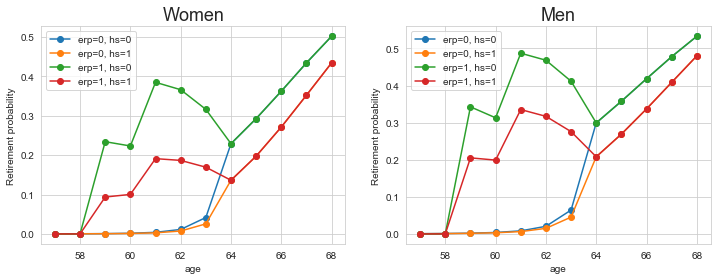

In [6]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
figs.choice_probs(test,axs[0],MA=0,ST=[0,1,2,3])
figs.choice_probs(test,axs[1],MA=1,ST=[0,1,2,3])
axs[0].set_title('Women',size=18)
axs[1].set_title('Men',size=18)
plt.show()

### Average pension benefit paths

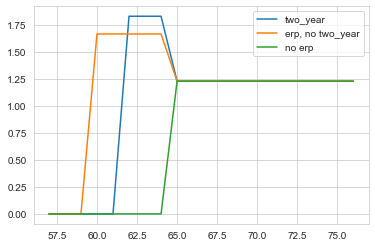

In [7]:
par = test.par
name = ['two_year', 'erp, no two_year', 'no erp']
zoom = 20
for ra in [0,1,2]:
    plt.plot(np.arange(par.start_T,par.start_T+zoom), np.mean(par.pension_arr[:zoom,0,0,ra],axis=1), label=name[ra])
plt.legend()

# Simulate

### Initialized wealth distribution

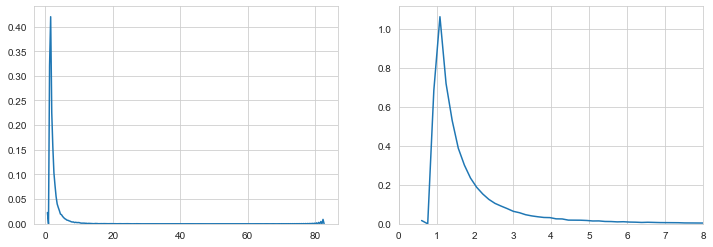

median: 1.258
mean:   1.792
std:    1.884


In [8]:
M_init = test.sim.m[0]
fig, axs = plt.subplots(1,2,figsize=(12,4))
sns.kdeplot(M_init,ax=axs[0],gridsize=200)
axs[1].set_xlim(0,8)
sns.kdeplot(M_init,ax=axs[1],gridsize=500)
plt.show()
print('median:',np.round(np.median(M_init),3))
print('mean:  ',np.round(np.mean(M_init),3))
print('std:   ',np.round(np.std(M_init),3))

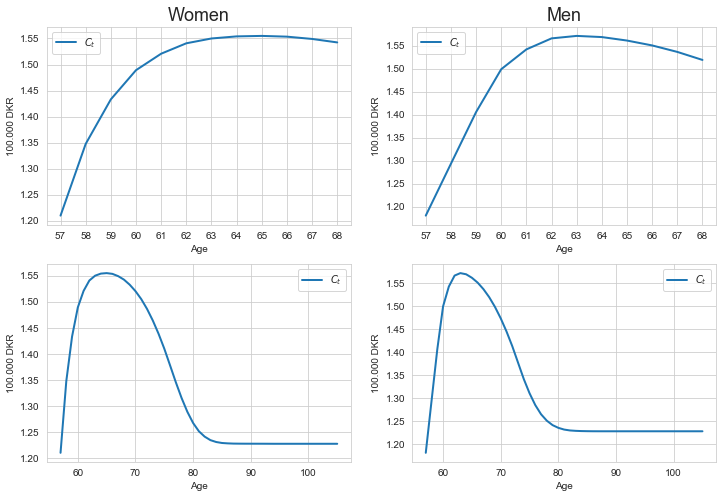

In [9]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
figs.lifecycle(test,axs[0,0],ma=0,vars=['c'],quantiles=False)
figs.lifecycle(test,axs[0,1],ma=1,vars=['c'],quantiles=False)
figs.lifecycle(test,axs[1,0],ma=0,vars=['c'],ages=[57,110],quantiles=False)
figs.lifecycle(test,axs[1,1],ma=1,vars=['c'],ages=[57,110],quantiles=False)
axs[0,0].set_title('Women',size=18)
axs[0,1].set_title('Men',size=18)
plt.show()

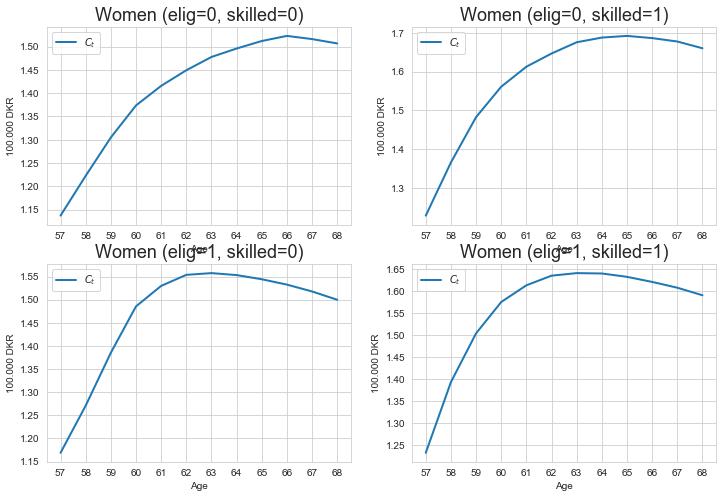

In [10]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
figs.lifecycle(test,axs[0,0],vars=['c'],ma=1,ST=[0],ages=[57,68],quantiles=False)
figs.lifecycle(test,axs[0,1],vars=['c'],ma=1,ST=[1],ages=[57,68],quantiles=False)
figs.lifecycle(test,axs[1,0],vars=['c'],ma=1,ST=[2],ages=[57,68],quantiles=False)
figs.lifecycle(test,axs[1,1],vars=['c'],ma=1,ST=[3],ages=[57,68],quantiles=False)
axs[0,0].set_title('Women (elig=0, skilled=0)',size=18)
axs[0,1].set_title('Women (elig=0, skilled=1)',size=18)
axs[1,0].set_title('Women (elig=1, skilled=0)',size=18)
axs[1,1].set_title('Women (elig=1, skilled=1)',size=18)
plt.show()

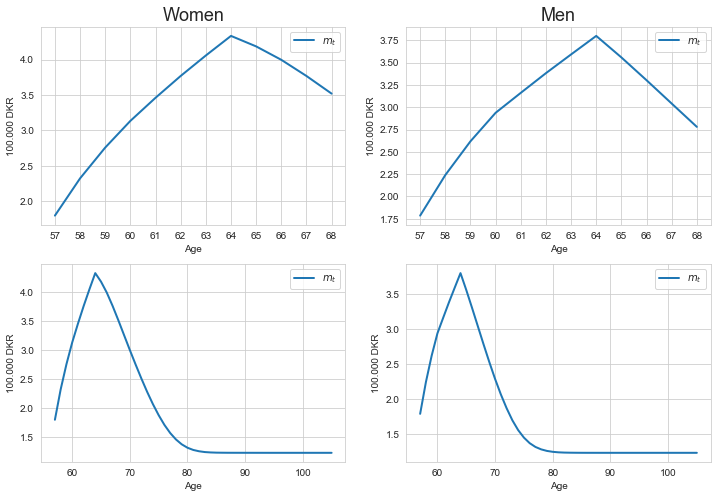

In [11]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
figs.lifecycle(test,axs[0,0],ma=0,vars=['m'],quantiles=False)
figs.lifecycle(test,axs[0,1],ma=1,vars=['m'],quantiles=False)
figs.lifecycle(test,axs[1,0],ma=0,vars=['m'],ages=[57,110],quantiles=False)
figs.lifecycle(test,axs[1,1],ma=1,vars=['m'],ages=[57,110],quantiles=False)
axs[0,0].set_title('Women',size=18)
axs[0,1].set_title('Men',size=18)
plt.show()

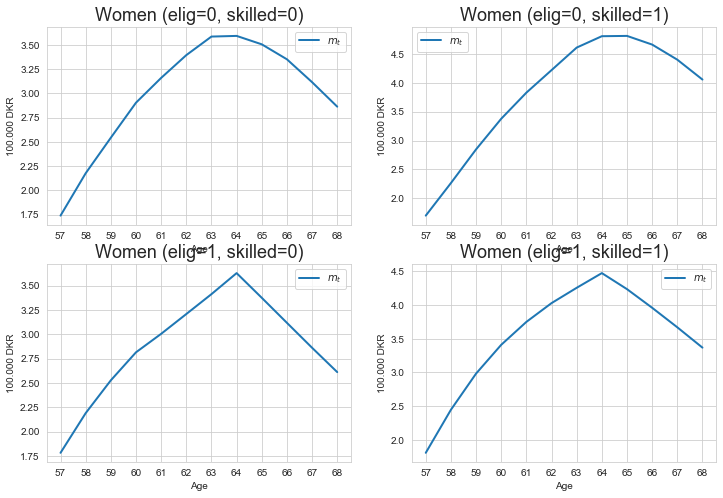

In [12]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
figs.lifecycle(test,axs[0,0],vars=['m'],ma=1,ST=[0],ages=[57,68],quantiles=False)
figs.lifecycle(test,axs[0,1],vars=['m'],ma=1,ST=[1],ages=[57,68],quantiles=False)
figs.lifecycle(test,axs[1,0],vars=['m'],ma=1,ST=[2],ages=[57,68],quantiles=False)
figs.lifecycle(test,axs[1,1],vars=['m'],ma=1,ST=[3],ages=[57,68],quantiles=False)
axs[0,0].set_title('Women (elig=0, skilled=0)',size=18)
axs[0,1].set_title('Women (elig=0, skilled=1)',size=18)
axs[1,0].set_title('Women (elig=1, skilled=0)',size=18)
axs[1,1].set_title('Women (elig=1, skilled=1)',size=18)
plt.show()

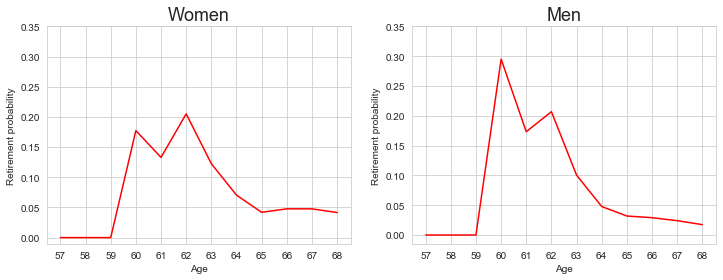

In [13]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
figs.retirement_probs(test,axs[0],ma=0)
figs.retirement_probs(test,axs[1],ma=1)
axs[0].set_title('Women',size=18)
axs[1].set_title('Men',size=18)
plt.show()

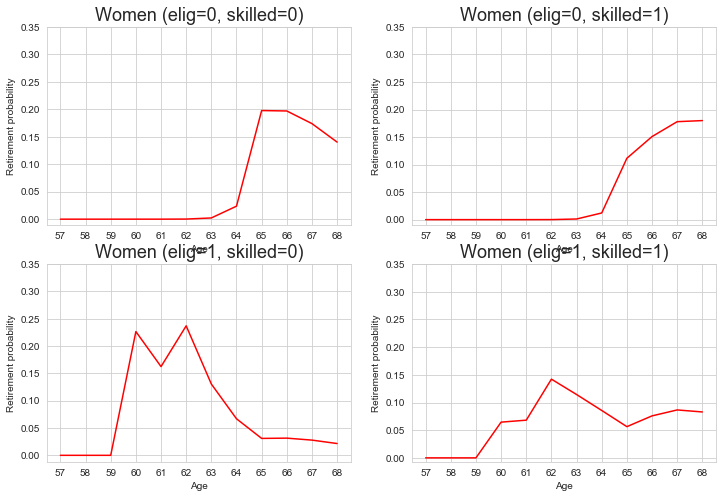

In [14]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
figs.retirement_probs(test,axs[0,0],ma=0,ST=[0])
figs.retirement_probs(test,axs[0,1],ma=0,ST=[1])
figs.retirement_probs(test,axs[1,0],ma=0,ST=[2])
figs.retirement_probs(test,axs[1,1],ma=0,ST=[3])
axs[0,0].set_title('Women (elig=0, skilled=0)',size=18)
axs[0,1].set_title('Women (elig=0, skilled=1)',size=18)
axs[1,0].set_title('Women (elig=1, skilled=0)',size=18)
axs[1,1].set_title('Women (elig=1, skilled=1)',size=18)
plt.show()

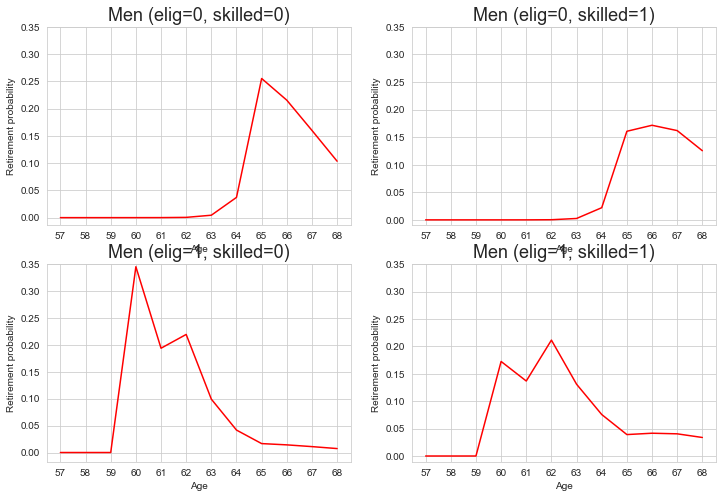

In [15]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
figs.retirement_probs(test,axs[0,0],ma=1,ST=[0])
figs.retirement_probs(test,axs[0,1],ma=1,ST=[1])
figs.retirement_probs(test,axs[1,0],ma=1,ST=[2])
figs.retirement_probs(test,axs[1,1],ma=1,ST=[3])
axs[0,0].set_title('Men (elig=0, skilled=0)',size=18)
axs[0,1].set_title('Men (elig=0, skilled=1)',size=18)
axs[1,0].set_title('Men (elig=1, skilled=0)',size=18)
axs[1,1].set_title('Men (elig=1, skilled=1)',size=18)
plt.show()

# Euler errors

### Plotting across states

Total: -4.970193788561077


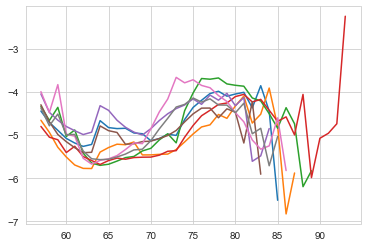

In [16]:
MA = [0,1]
ST = [0,1,2,3]
ages = [test.par.start_T,test.par.end_T-1]
for ma in MA:
    for st in ST:
        funs.log_euler(test,MA=[ma],ST=[st],ages=ages,plot=True)
print('Total:',funs.log_euler(test,ages=ages)[0])

### Can euler errors be improved?

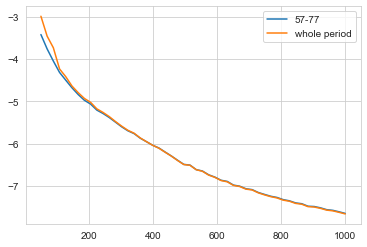

In [11]:
Na = test.par.Na
funs.resolve(test,Na=np.linspace(50,1000))
test.par.Na = Na
test.solve(recompute=True) # reset

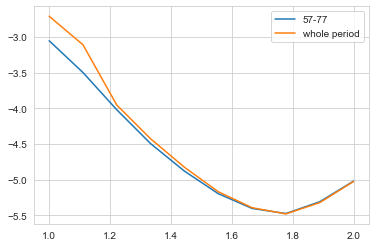

In [12]:
a_phi = test.par.a_phi
funs.resolve(test,a_phi = np.linspace(1.0,2.0,num=10))
test.par.a_phi = a_phi
test.solve(recompute=True) # reset

# Time the model and simulation

In [13]:
test.par.simT=20

In [14]:
def solve():
    test.solve() 
    
def simulate():
    test.simulate()
    
funcs = [solve,simulate]
argu = dict([(funcs[0], []),
             (funcs[1], [])])
names = dict([(funcs[0], 'solve: #a=' + str(test.par.Na)),
              (funcs[1], 'simulate: T=20, N=' + str(test.par.simN))])

In [16]:
funs.my_timer(funcs,argu,names,unit='s',ndigits=2,Ntimes=100)

time unit is: s
+--------------------------+------+--------+------+------+-------+
|           func           |  lq  | median | mean |  uq  | neval |
+--------------------------+------+--------+------+------+-------+
|      solve: #a=200       | 0.59 |  0.61  | 0.65 | 0.66 | 100.0 |
| simulate: T=20, N=100000 | 1.54 |  1.58  | 1.64 | 1.64 | 100.0 |
+--------------------------+------+--------+------+------+-------+


In [5]:
funs.my_timer(funcs,argu,names,unit='s',ndigits=2,Ntimes=100)

time unit is: s
+--------------------------+------+--------+------+------+-------+
|           func           |  lq  | median | mean |  uq  | neval |
+--------------------------+------+--------+------+------+-------+
|      solve: #a=200       | 0.59 |  0.59  | 0.6  | 0.6  | 100.0 |
| simulate: T=20, N=100000 | 1.52 |  1.53  | 1.53 | 1.54 | 100.0 |
+--------------------------+------+--------+------+------+-------+
